### Load and Preview Data

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../data//raw/healthcare_analytics_dataset.csv")

# Preview disease and location columns
df[["disease_type", "zip_code", "state"]].head()

,disease_type,zip_code,state
0,Diabetes,53263,West Bengal
1,Cancer,40876,Maharashtra
2,Diabetes,40474,Tamil Nadu
3,Flu,13434,West Bengal
4,Flu,8551,Maharashtra


### Disease Counts by State

In [2]:
# Group disease count by state
disease_state = (
    df.groupby(["state", "disease_type"]).size().reset_index(name="case_count")
)

# Preview
disease_state.head()

,state,disease_type,case_count
0,Delhi,Asthma,12
1,Delhi,COVID-19,15
2,Delhi,Cancer,17
3,Delhi,Diabetes,11
4,Delhi,Flu,10


### Pivot for Heatmap

In [3]:
# Create pivot for heatmap-style plot
heatmap_df = disease_state.pivot(
    index="state", columns="disease_type", values="case_count"
).fillna(0)
heatmap_df.head()

disease_type,Asthma,COVID-19,Cancer,Diabetes,Flu,Hypertension
state,,,,,,
Delhi,12,15,17,11,10,12
Gujarat,15,11,12,15,13,5
Karnataka,16,11,16,8,12,16
Maharashtra,16,16,18,17,11,12
Tamil Nadu,17,17,14,14,12,18


### Plot Heatmap of Disease Spread

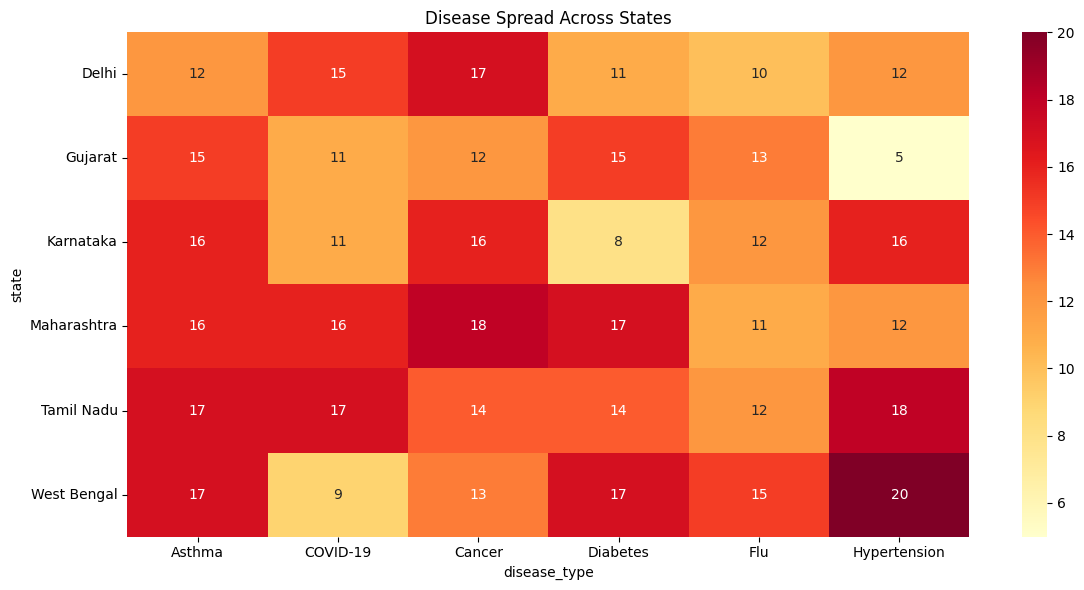

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Create output folder
os.makedirs("../visuals/plots", exist_ok=True)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_df, cmap="YlOrRd", annot=True, fmt="g")
plt.title("Disease Spread Across States")
plt.tight_layout()

# Save
plt.savefig("../visuals/plots/disease_spread_by_state.png")
plt.show()

### Bar Chart – Top 10 States by Total Cases

C:\Users\HP\AppData\Local\Temp\ipykernel_2056\485248972.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_totals.values, y=state_totals.index, palette="viridis")


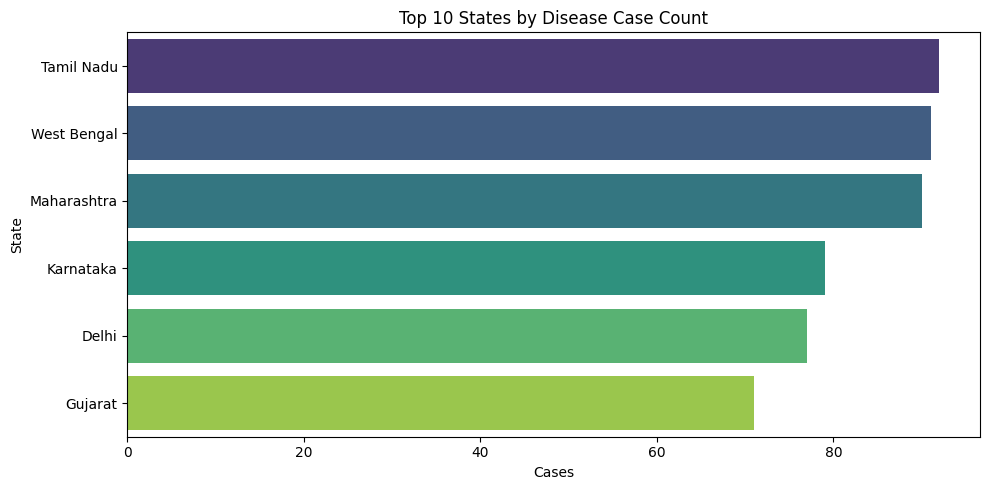

In [5]:
# Total disease cases by state
state_totals = df["state"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=state_totals.values, y=state_totals.index, palette="viridis")
plt.title("Top 10 States by Disease Case Count")
plt.xlabel("Cases")
plt.ylabel("State")
plt.tight_layout()
plt.savefig("../visuals/plots/top_states_disease_cases.png")
plt.show()